# 1 Data Preparation

In [2]:
import pandas as pd

# -------------------------------------------------
# Load the training and testing datasets
# -------------------------------------------------
# Make sure this notebook is running in the same directory
# where these CSV files are stored, or provide full file paths.
# -------------------------------------------------

train_path = "PoliticalDiscussion_with_llm_labels_train.csv"
test_path = "PoliticalDiscussion_with_llm_labels_test.csv"

# Read CSV files
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# -------------------------------------------------
# Display basic information about the datasets
# -------------------------------------------------

print("Training Set Preview:")
display(train_df.head())

print("Training Set Shape:", train_df.shape)

print("\nTest Set Preview:")
display(test_df.head())

print("Test Set Shape:", test_df.shape)


Training Set Preview:


,kind_comment,subreddit_comment,submission_id,comment_id,parent_id,is_top_level,body,author_comment,score_comment,created_utc_comment,...,score_submission,created_utc_submission,link_flair_text,link_flair_type,link_flair_template_id,link_flair_richtext,vader_scores,vader_compound,misinfo_label,narrative_score
0,comment,PoliticalDiscussion,111k3ss,j8ihm7l,t3_111k3ss,True,2 main reasons: voters approved of his handlin...,BenAustinRock,8,1.676389e+09,...,135,1.676323e+09,US Elections,text,969bd296-4091-11e6-8da9-0ef2cf42ad11,[],"{'neg': 0.0, 'neu': 0.843, 'pos': 0.157, 'comp...",0.4215,0.0,0.25
1,comment,PoliticalDiscussion,jk0vif,gagt1zc,t3_jk0vif,True,"I think the shortest answer is that ""they've a...",TheEndIsWhereWeBegin,188,1.603953e+09,...,77,1.603935e+09,US Elections,text,969bd296-4091-11e6-8da9-0ef2cf42ad11,[],"{'neg': 0.14, 'neu': 0.676, 'pos': 0.184, 'com...",0.6080,0.0,0.80
2,comment,PoliticalDiscussion,18j1p0q,kdhex4e,t1_kdh0uws,False,Would be wild if we made that third legislativ...,CapriciousBit,7,1.702658e+09,...,111,1.702652e+09,Political Theory,text,16781150-43b7-11e6-9ee4-0e6ebcfdf545,[],"{'neg': 0.065, 'neu': 0.793, 'pos': 0.142, 'co...",0.3246,0.0,0.80
3,comment,PoliticalDiscussion,ytennf,iw43wkr,t1_iw42r73,False,Inherently better? No one said that. Democrats...,Cockblocktimus_Pryme,15,1.668285e+09,...,613,1.668278e+09,US Elections,text,969bd296-4091-11e6-8da9-0ef2cf42ad11,[],"{'neg': 0.122, 'neu': 0.556, 'pos': 0.322, 'co...",0.5574,0.0,0.50
4,comment,PoliticalDiscussion,4shlot,d59c2cq,t1_d59akr7,False,"Can confirm, moved to Clinton a while ago. I l...",GabrielGray,53,1.468340e+09,...,1458,1.468338e+09,US Elections,NaN,NaN,NaN,"{'neg': 0.0, 'neu': 0.668, 'pos': 0.332, 'comp...",0.8151,0.0,0.80


Training Set Shape: (11179, 29)

Test Set Preview:


,kind_comment,subreddit_comment,submission_id,comment_id,parent_id,is_top_level,body,author_comment,score_comment,created_utc_comment,...,score_submission,created_utc_submission,link_flair_text,link_flair_type,link_flair_template_id,link_flair_richtext,vader_scores,vader_compound,misinfo_label,narrative_score
0,comment,PoliticalDiscussion,141ddqs,jn0umjj,t1_jn0u3jl,False,"This is from the FL version:\n\n""Classroom ins...",jmastaock,28,1.685991e+09,...,258,1.685969e+09,US Politics,text,8ba3f5de-4092-11e6-b8ce-0ee96c7aff3d,[],"{'neg': 0.0, 'neu': 0.92, 'pos': 0.08, 'compou...",0.6966,0.0,1.0
1,comment,PoliticalDiscussion,4mjewv,d3vyswi,t3_4mjewv,True,I think part of the reason is to draw trumps f...,janethefish,91,1.465065e+09,...,171,1.465063e+09,NaN,NaN,NaN,NaN,"{'neg': 0.183, 'neu': 0.737, 'pos': 0.079, 'co...",-0.8072,0.0,0.8
2,comment,PoliticalDiscussion,4zld3c,d6ws95v,t1_d6wrtcz,False,"Also, many of the establishment candidates did...",19djafoij02,55,1.472167e+09,...,55,1.472165e+09,Political History,NaN,NaN,NaN,"{'neg': 0.234, 'neu': 0.766, 'pos': 0.0, 'comp...",-0.8338,0.0,0.8
3,comment,PoliticalDiscussion,12f2j18,jfe2bvy,t3_12f2j18,True,No. To the extent that speculative hoarding of...,k_dubious,17,1.680915e+09,...,61,1.680908e+09,US Politics,text,8ba3f5de-4092-11e6-b8ce-0ee96c7aff3d,[],"{'neg': 0.156, 'neu': 0.779, 'pos': 0.066, 'co...",-0.6597,0.0,0.2
4,comment,PoliticalDiscussion,17qk738,k8dg1z0,t3_17qk738,True,The reason folks will have a hard time answeri...,BigDaddyCoolDeisel,86,1.699460e+09,...,312,1.699445e+09,US Elections,text,969bd296-4091-11e6-8da9-0ef2cf42ad11,[],"{'neg': 0.093, 'neu': 0.847, 'pos': 0.06, 'com...",-0.4259,0.0,0.9


Test Set Shape: (2795, 29)


## Prepare Text and Labels

In [3]:
# Input text (body column)
X_train_text = train_df["body"].astype(str)
X_test_text = test_df["body"].astype(str)

# Classification labels
y_train = train_df["misinfo_label"].astype(int)
y_test = test_df["misinfo_label"].astype(int)

print("Example Training Text:", X_train_text.iloc[0])
print("Example Label:", y_train.iloc[0])

Example Training Text: 2 main reasons: voters approved of his handling of the pandemic and Charlie Crist was his opponent.
Example Label: 0


# 2 BERT Model

In [4]:
# Load BERT Tokenizer
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Tokenization function
def tokenize(batch):
    return tokenizer(
        batch,
        padding="max_length",
        truncation=True,
        max_length=256,
        return_tensors="pt"
    )

In [5]:
# Build PyTorch Dataset
import torch
from torch.utils.data import Dataset, DataLoader

class TextDataset(Dataset):
    def __init__(self, texts, labels):
        self.encodings = tokenize(texts.tolist())
        self.labels = torch.tensor(labels.tolist(), dtype=torch.long)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item["labels"] = self.labels[idx]
        return item

train_dataset = TextDataset(X_train_text, y_train)
test_dataset = TextDataset(X_test_text, y_test)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)


In [9]:
# Load BERT Model for Classification
from transformers import BertForSequenceClassification
from torch.optim import AdamW


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels=2   # binary classification
)

model.to(device)

optimizer = AdamW(model.parameters(), lr=2e-5)

Using device: cpu


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## fine-tune BERT

In [10]:
epochs = 2

for epoch in range(epochs):
    model.train()
    total_loss = 0

    for batch in train_loader:
        optimizer.zero_grad()

        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            labels=labels
        )

        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1} completed. Total Loss = {total_loss:.4f}")


Epoch 1 completed. Total Loss = 428.0142
Epoch 2 completed. Total Loss = 320.3812


# 3 Evaluate (Confusion Matrix + F1 Score)

In [11]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report

model.eval()
preds = []
true_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        predictions = torch.argmax(logits, dim=1)

        preds.extend(predictions.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

print("F1 Score:", f1_score(true_labels, preds, average="weighted"))
print("Confusion Matrix:\n", confusion_matrix(true_labels, preds))
print("\nClassification Report:\n", classification_report(true_labels, preds))

F1 Score: 0.8751259051953292
Confusion Matrix:
 [[2506   27]
 [ 238   24]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      2533
           1       0.47      0.09      0.15       262

    accuracy                           0.91      2795
   macro avg       0.69      0.54      0.55      2795
weighted avg       0.87      0.91      0.88      2795



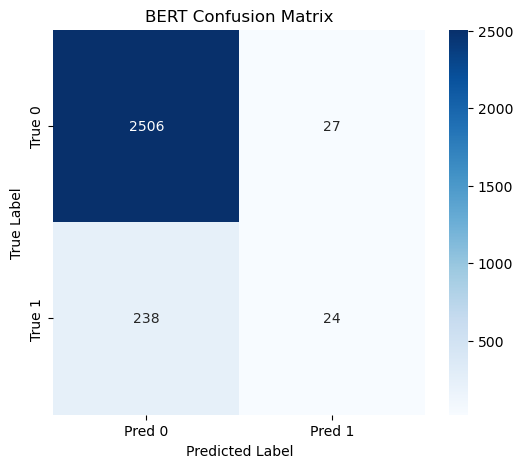

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_labels, preds)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred 0', 'Pred 1'],
            yticklabels=['True 0', 'True 1'])

plt.title("BERT Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
